# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [6]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()
df.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [4]:
# Create X and y 
y = df.Survived
X = df.drop(columns = ['Survived', 'PassengerId'])

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [10]:
# Train the classifier using training data
tree = DecisionTreeClassifier(random_state=1, criterion='entropy', class_weight='balanced')
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [11]:
# Make predictions using test set 
y_hat = tree.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.791030534351145

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

[0.7807417855957517,
 0.7456023896448722,
 0.8352140723531364,
 0.8352140723531364,
 0.8086209757716563,
 0.8009873879853967,
 0.8249253235977432,
 0.7846830401593097,
 0.78086624626618,
 0.7917358114835712,
 0.8112761367407899,
 0.8112761367407899,
 0.8221457019581812,
 0.8161301028874876,
 0.7845585794888815,
 0.8106953202787919,
 0.7938101559907069,
 0.7954281447062728,
 0.7714902090939263,
 0.7954281447062728,
 0.7807417855957517,
 0.7807417855957517,
 0.8062977099236641,
 0.7676734152007966,
 0.7861765682044475,
 0.7954281447062728,
 0.80791569863923,
 0.8062977099236641,
 0.8008629273149684,
 0.7861765682044475,
 0.7938101559907069,
 0.7954281447062728]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

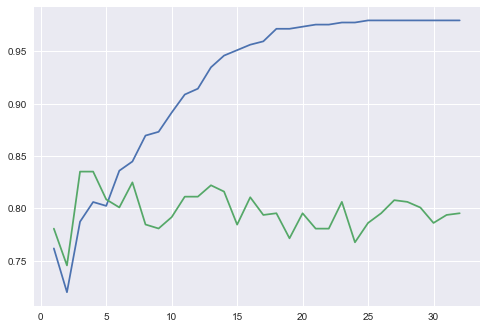

In [27]:
# Identify the optimal tree depth for given data
depths = range(1,33)
info = []
for i in depths:
    tree_0 = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree_0.fit(X_train, y_train)
    y_hat_0_test = tree_0.predict(X_test)
    y_hat_0_train = tree_0.predict(X_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_hat_0_test)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_hat_0_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    roc_auc = auc(false_positive_rate_train, true_positive_rate_train)
    info.append((roc_auc,roc_auc_test))

    
x_ = [thing[0] for thing in info]
y_ = [thing[1] for thing in info]
plt.plot(depths,x_, depths,y_)
display(y_)
plt.legend()
plt.show

In [ ]:
# You observations here 

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

[0.8031861931629606,
 0.7782110852970461,
 0.7782110852970461,
 0.8133504812479256,
 0.7807417855957517,
 0.7807417855957517,
 0.7807417855957517,
 0.7807417855957517,
 0.7807417855957517]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

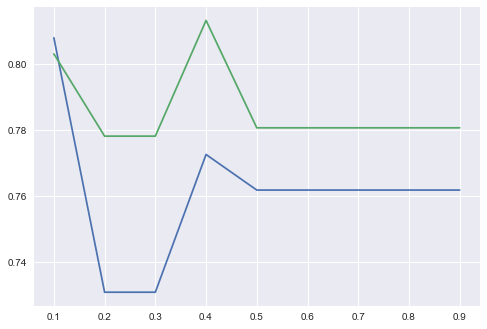

In [28]:
# Identify the optimal min-samples-split for given data
depths = np.arange(.1,1, .1)
info = []
for i in depths:
    tree_0 = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    tree_0.fit(X_train, y_train)
    y_hat_0_test = tree_0.predict(X_test)
    y_hat_0_train = tree_0.predict(X_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_hat_0_test)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_hat_0_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    roc_auc = auc(false_positive_rate_train, true_positive_rate_train)
    info.append((roc_auc,roc_auc_test))

    
x_ = [thing[0] for thing in info]
y_ = [thing[1] for thing in info]
plt.plot(depths,x_, depths,y_)
display(y_)
plt.legend()
plt.show

In [ ]:
# Your observations here

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

[0.7456023896448722,
 0.7807417855957517,
 0.7807417855957517,
 0.6455360106206438]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

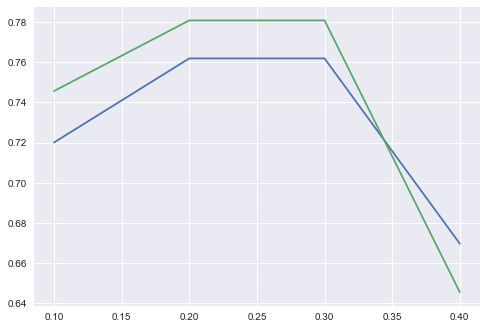

In [29]:
# Calculate the optimal value for minimum sample leafs
depths = np.arange(.1,.5, .1)
info = []
for i in depths:
    tree_0 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    tree_0.fit(X_train, y_train)
    y_hat_0_test = tree_0.predict(X_test)
    y_hat_0_train = tree_0.predict(X_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_hat_0_test)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_hat_0_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    roc_auc = auc(false_positive_rate_train, true_positive_rate_train)
    info.append((roc_auc,roc_auc_test))

    
x_ = [thing[0] for thing in info]
y_ = [thing[1] for thing in info]
plt.plot(depths,x_, depths,y_)
display(y_)
plt.legend()
plt.show

In [ ]:
# Your observations here 


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

[0.8062977099236641,
 0.7932293395287089,
 0.7960089611682708,
 0.8008629273149684,
 0.7916113508131429,
 0.7682542316627945,
 0.7861765682044475,
 0.7839777630268835,
 0.7921921672751411,
 0.7557666777298374,
 0.7905741785595752,
 0.776924991702622]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

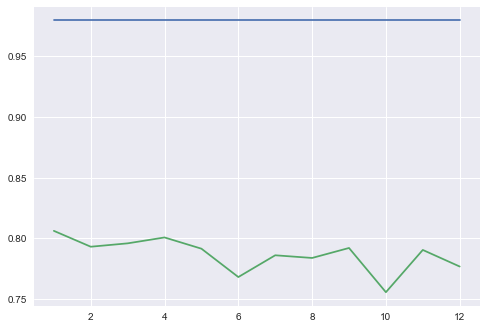

In [30]:
# Find the best value for optimal maximum feature size
depths = range(1,13)
info = []
for i in depths:
    tree_0 = DecisionTreeClassifier(criterion='entropy', max_features=i)
    tree_0.fit(X_train, y_train)
    y_hat_0_test = tree_0.predict(X_test)
    y_hat_0_train = tree_0.predict(X_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_hat_0_test)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_hat_0_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    roc_auc = auc(false_positive_rate_train, true_positive_rate_train)
    info.append((roc_auc,roc_auc_test))

    
x_ = [thing[0] for thing in info]
y_ = [thing[1] for thing in info]
plt.plot(depths,x_, depths,y_)
display(y_)
plt.legend()
plt.show

In [ ]:
# Your observations here

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [37]:
# Train a classifier with optimal values identified above
tree_0 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=.3, min_samples_split=.4,max_features=3)
tree_0.fit(X_train, y_train)
y_hat_0_test = tree_0.predict(X_test)
y_hat_0_train = tree_0.predict(X_train)
false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_hat_0_test)
false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train, y_hat_0_train)
roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
roc_auc = auc(false_positive_rate_train, true_positive_rate_train)

display(roc_auc,roc_auc_test)

0.6696746411483254

0.6455360106206438

In [ ]:
# You observations here

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 